In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
import io
%cd "C:\Users\91905\OneDrive\Desktop\D.S\Data sets\cust_credit"

C:\Users\91905\OneDrive\Desktop\D.S\Data sets\cust_credit


In [3]:
cust_data=pd.read_csv('customer_data.csv')

In [4]:
pay_data=pd.read_csv('payment_data.csv')

This is the customer credit card data, we've given two data sets ,where customer data represents whether the customer is Risky or not and the label is the dependent variable describing 1 as Risky and 0 as Not Risky and the payments data set represents the customer transcations related data.

We will work on customer data to find whether he's risky or not.

In [5]:
pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


#   Descriptive Stats

In [6]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [7]:
cust_data.shape
#It is with the shape of 1125 rows with 13 columns

(1125, 13)

In [8]:
cust_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [9]:
cust_data.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [10]:
cust_data.describe()
#different statistical analysis between the variabls in the data

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [11]:
cust_data.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [12]:
cust_data.label.value_counts(dropna=False)

0    900
1    225
Name: label, dtype: int64

# EDA

Text(0.5, 1.0, 'credit card risk')

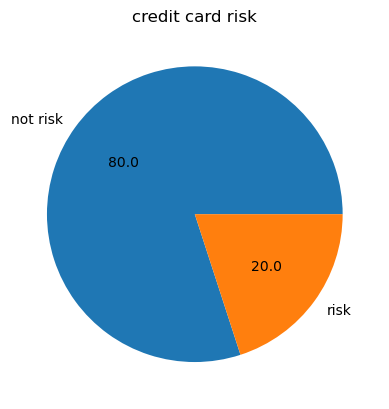

In [13]:
plt.pie(cust_data['label'].value_counts(),labels=["not risk","risk"],autopct='%0.1f')
plt.title('credit card risk')
#It shows that the 80% of the customers are not risk and 20% of the data is risky.

<AxesSubplot: >

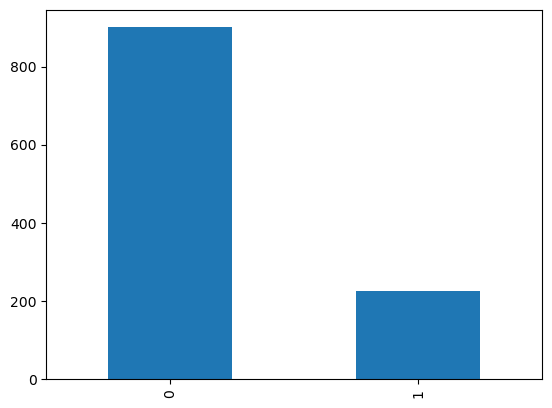

In [14]:
cust_data.label.value_counts().plot(kind='bar')
#The bar plot shows the count of the levels(i.e,0,1) in the Label data.

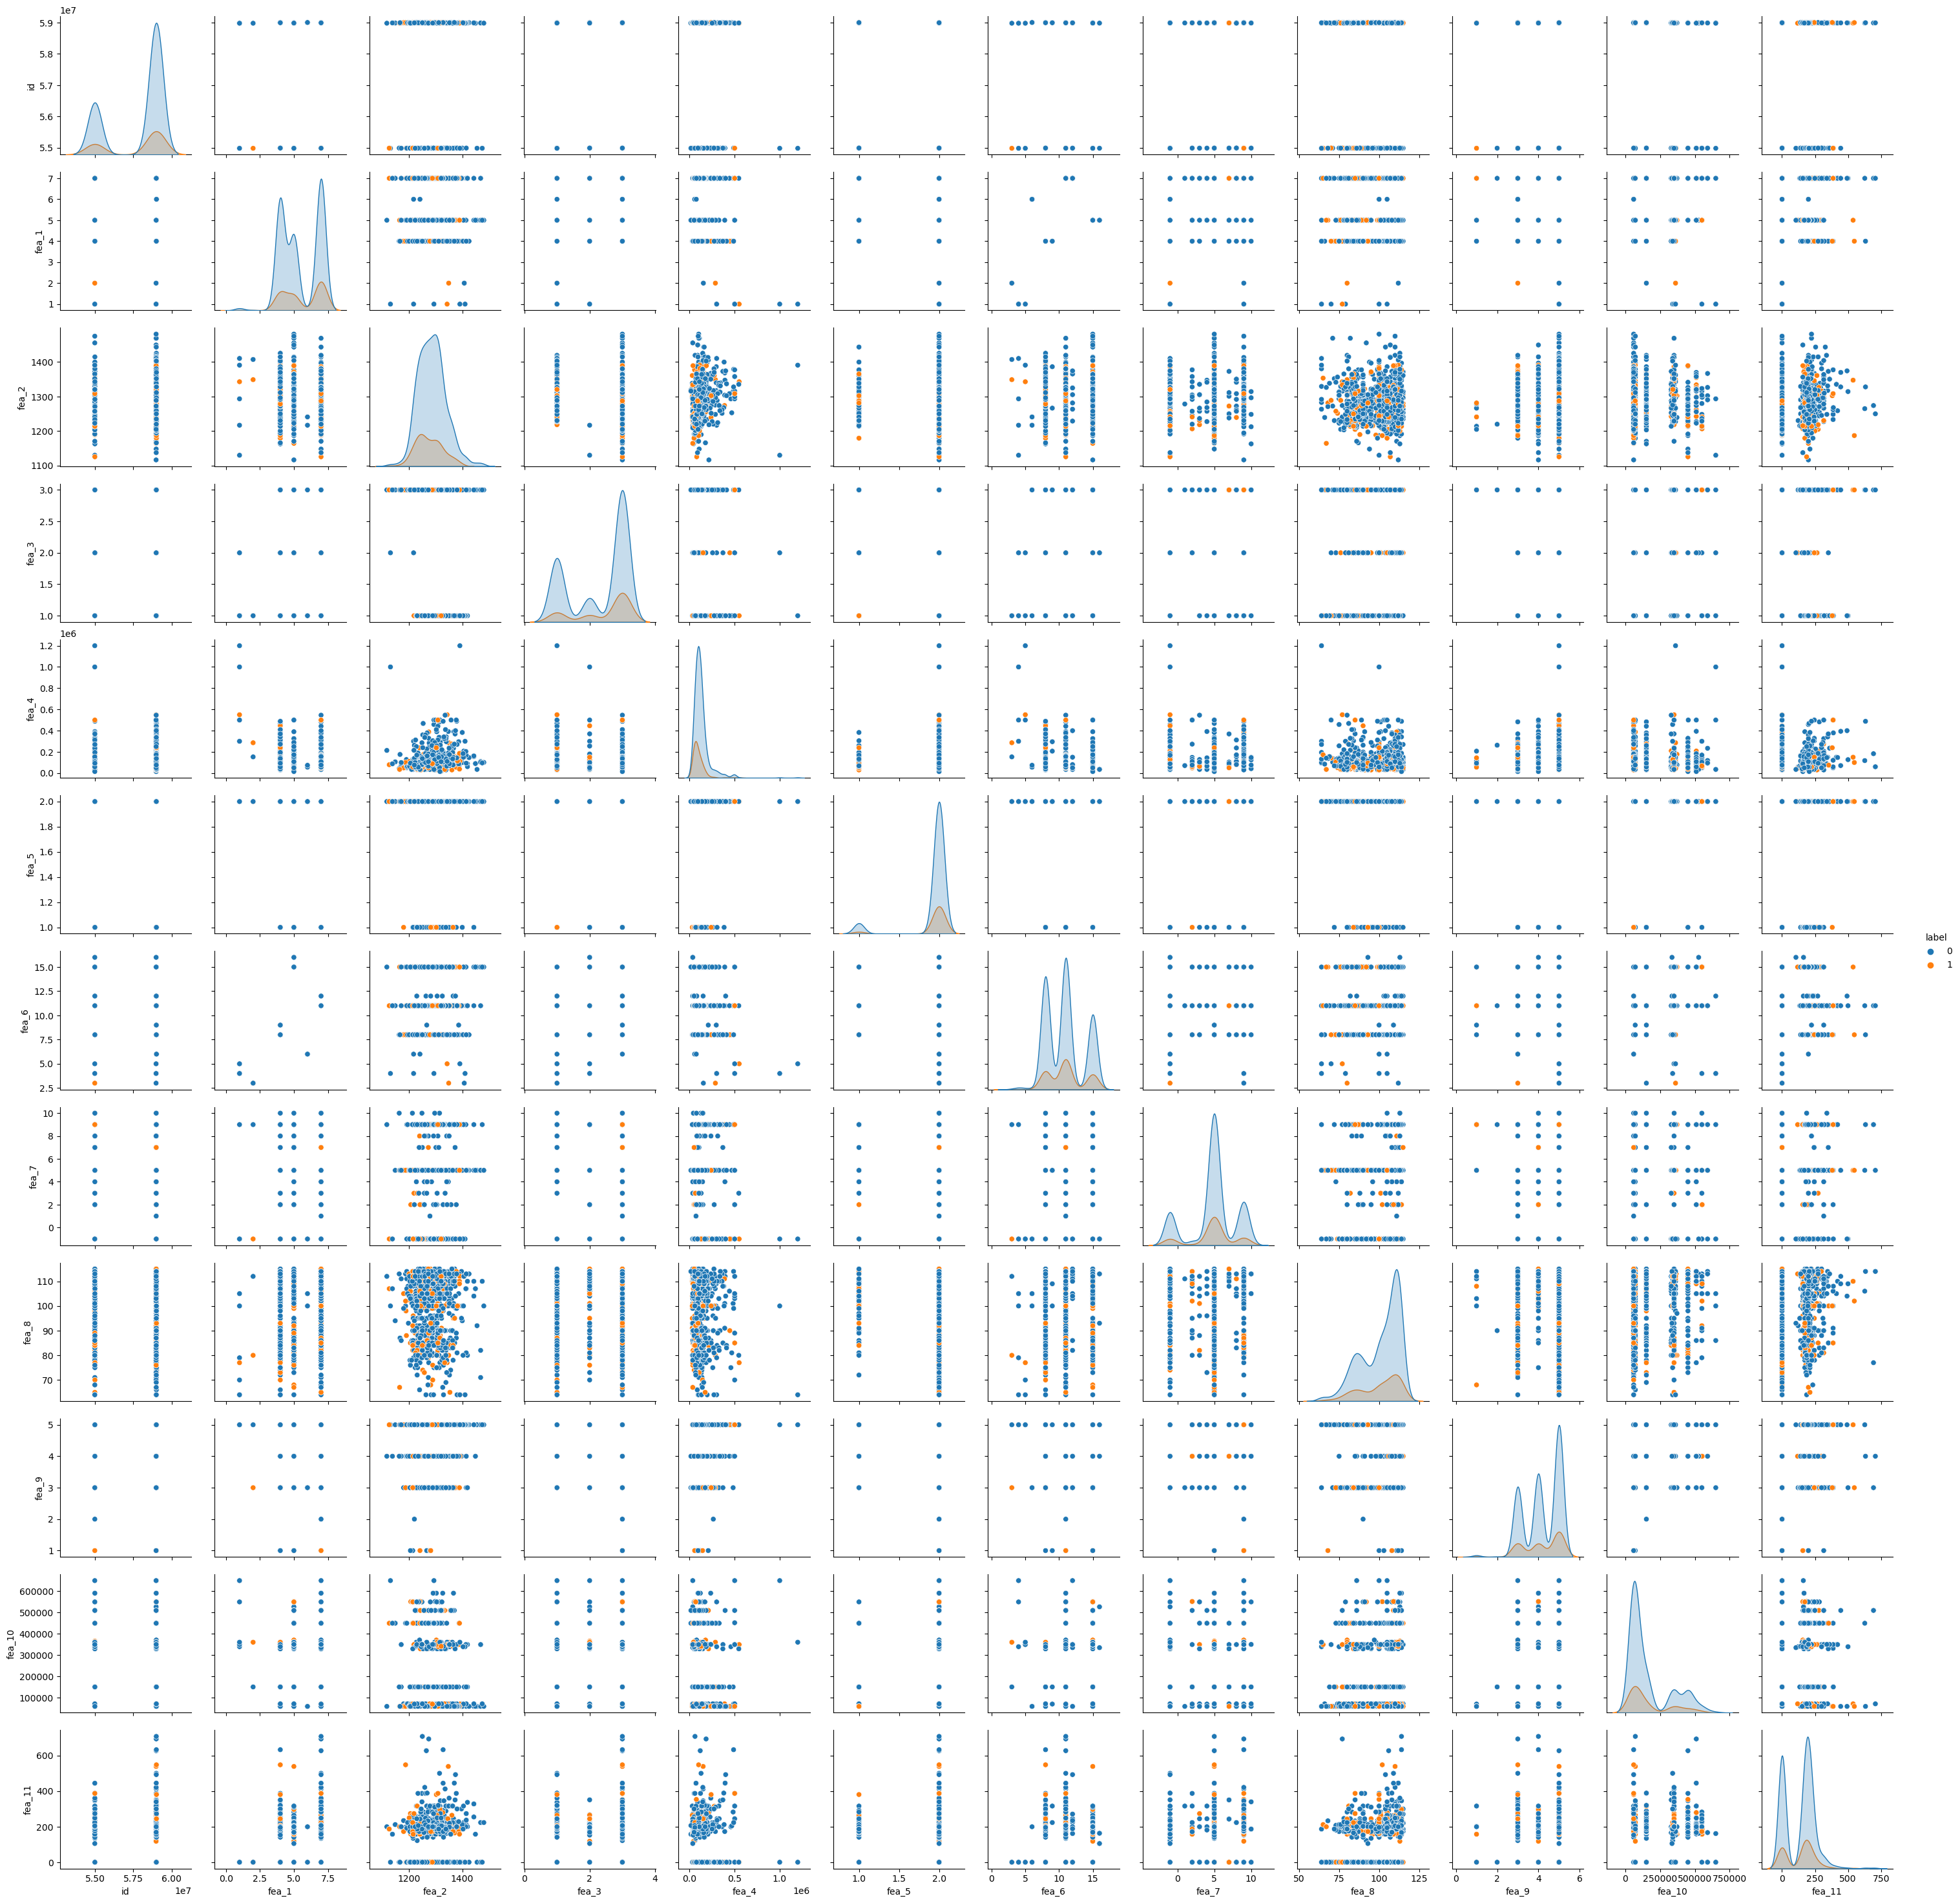

In [15]:
sns.pairplot(cust_data,hue='label')
#Pair plot between the variables in the different features in the data by giving the scatter and hist plot

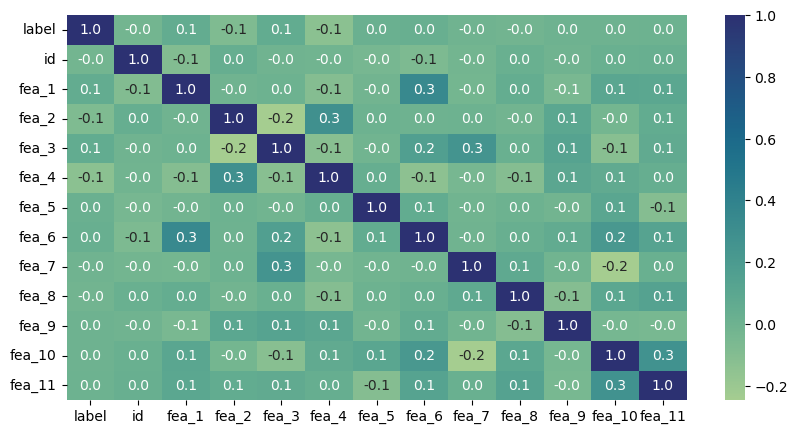

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap( cust_data.corr(),annot=True,fmt='.1f',cmap='crest')
plt.show()
#Here the heatmap shows  there is no multi-collinearity between the numeric variables

#  Pre-Processing

In [17]:
cust_data.isnull().sum()
#count of null values in each column in the data

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [18]:
(cust_data.isnull().sum().sort_values(ascending=False))/cust_data.shape[0]
#percentile of the null values

fea_2     0.132444
label     0.000000
id        0.000000
fea_1     0.000000
fea_3     0.000000
fea_4     0.000000
fea_5     0.000000
fea_6     0.000000
fea_7     0.000000
fea_8     0.000000
fea_9     0.000000
fea_10    0.000000
fea_11    0.000000
dtype: float64

There are missing values in the fea_2 column in customer data, we can do the mean/median imputation.

In [19]:
cust_data.fea_2=cust_data.fea_2.fillna(cust_data.fea_2.mean())

In [20]:
cust_data.isnull().sum()
#null values are imputed by mean imputation

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [21]:
cust_data.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

# Feature Scaling and Encoding

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [24]:
ss=StandardScaler()
mm=MinMaxScaler()

In [25]:
scaling=cust_data.drop(['label','id'],axis=1)
#we are dropping the dependent variable Y as it should not scaled and id is not necessary.

In [26]:
cust_data_mm=mm.fit_transform(scaling)

In [27]:
cust_data_mm=pd.DataFrame(cust_data_mm,columns=scaling.columns)

In [28]:
cust_data_mm=cust_data_mm.reset_index()

In [29]:
cust_data_mm.head()

,index,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.00,0.154727,0.345485
1,1,0.500000,0.440329,0.0,0.082700,1.0,0.384615,0.000000,0.705882,0.50,0.477501,0.291987
2,2,1.000000,0.497942,0.0,0.080169,1.0,0.615385,0.000000,0.725490,1.00,0.020338,0.000000
3,3,1.000000,0.600823,0.0,0.114768,1.0,0.615385,0.545455,0.901961,0.50,0.000142,0.000000
4,4,1.000000,0.459290,0.5,0.037131,1.0,0.615385,0.545455,0.862745,0.75,0.661076,0.278149


In [44]:
cust_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141


In [77]:
x=cust_data_mm.drop('index',axis=1)
y=cust_data.label
#Seperating the data into X and Y
# drop index as it is not required fot prediction and uncecessary.

<AxesSubplot: >

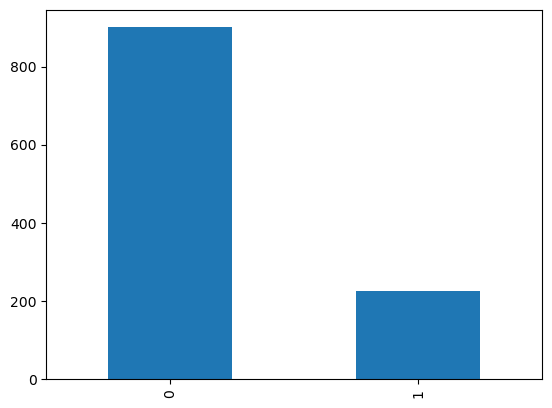

In [78]:
y.value_counts().plot(kind='bar')

As the data is Imbalanced we can not go with model bulding as the model will give wrong predictions.

we will use SMOTE algorithm for to balance the data, for that we need to install a library imblearn

In [32]:
!pip install imblearn

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smote=SMOTE(random_state=41)
x_smote, y_smote = smote.fit_resample(x,y)

In [81]:
print(y.value_counts())
print(y_smote.value_counts())

0    900
1    225
Name: label, dtype: int64
1    900
0    900
Name: label, dtype: int64


It clearly shows that SMOTE algorithm has balance the data

# Model Building

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay

In [83]:
logit=LogisticRegression()
tree=DecisionTreeClassifier(max_depth=8)
rf=RandomForestClassifier(n_estimators=2000)
gb=GradientBoostingClassifier(n_estimators=30)

# Logistic Regression

In [114]:
logit=LogisticRegression(max_iter=3000)

In [115]:
logit_model=logit.fit(x_smote,y_smote)

In [116]:
logit_model.score(x_smote,y_smote)

0.61

In [60]:
cross_val_score(logit_model,x_smote,y_smote)

array([0.60277778, 0.54444444, 0.57777778, 0.58333333, 0.61388889])

In [61]:
np.mean([[0.60277778, 0.54444444, 0.57777778, 0.58333333, 0.61388889]])
# The cross validation score is so close but the model is nearer to underfitting i.e, accuracy is not good. 

0.5844444440000001

In [87]:
logit_predict=logit_model.predict(x_smote)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_smote,logit_predict))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       900
           1       0.60      0.66      0.63       900

    accuracy                           0.61      1800
   macro avg       0.61      0.61      0.61      1800
weighted avg       0.61      0.61      0.61      1800



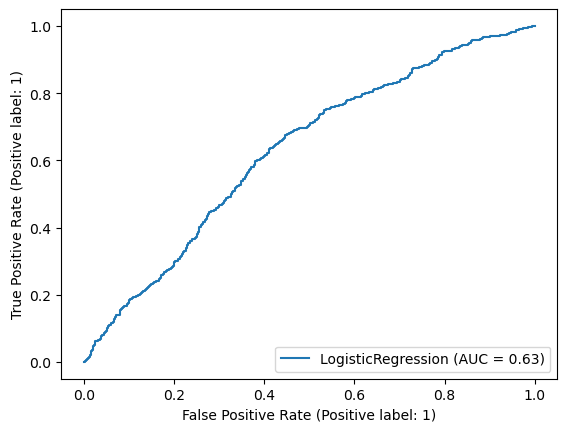

In [90]:
RocCurveDisplay.from_estimator(logit_model,x_smote,y_smote)
#The curve is not in the original form and it is in the form of similart to line, so it tells that logistic model is not good.

# Decision Trees

In [91]:
tree_model=tree.fit(x_smote,y_smote)

In [92]:
tree_model.score(x_smote,y_smote)

0.8222222222222222

In [93]:
cross_val_score(tree_model,x_smote,y_smote)

array([0.6       , 0.65555556, 0.73888889, 0.77222222, 0.78055556])

In [94]:
np.mean([0.6       , 0.65555556, 0.73888889, 0.77222222, 0.78055556])
#The cross validation score is having difference wiith the Decision tree model score. Let's try more advanced 
#models and compare.

0.709444446

In [95]:
tree_predict=tree.predict(x_smote)

In [96]:
pd.DataFrame(tree_model.feature_importances_,x.columns).sort_values(by=0,ascending=False)
#These are the features that are important for prediction which is found by decision tree model.

,0
fea_10,0.367255
fea_4,0.173661
fea_11,0.120182
fea_8,0.110927
fea_3,0.072181
fea_9,0.055575
fea_2,0.048752
fea_1,0.033986
fea_6,0.010174
fea_7,0.007308


In [97]:
print(classification_report(y_smote,tree_predict))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       900
           1       0.78      0.89      0.83       900

    accuracy                           0.82      1800
   macro avg       0.83      0.82      0.82      1800
weighted avg       0.83      0.82      0.82      1800



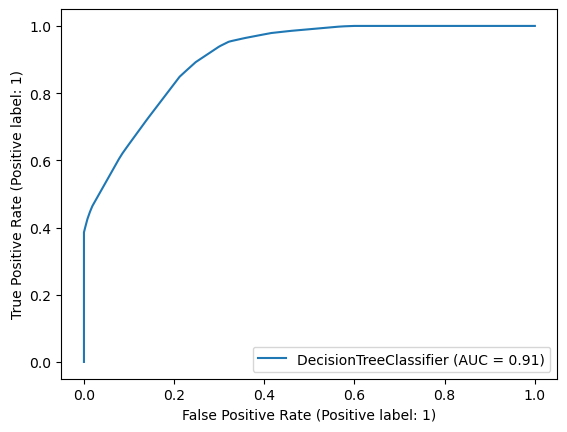

In [98]:
RocCurveDisplay.from_estimator(tree_model,x_smote,y_smote)
#The change with the shape of the curve is drastically improved by comparing with the Logistic model.
#But The curve is not in the original form and it is not the good ROC curve as the edges are sharp.

# Random Forest

In [99]:
rf=RandomForestClassifier(n_estimators=2000,max_depth=5)

In [100]:
rf_model=rf.fit(x_smote,y_smote)

In [101]:
rf_model.score(x_smote,y_smote)

0.7922222222222223

In [102]:
rf_predict=rf_model.predict(x_smote)

In [103]:
cross_val_score(rf_model,x_smote,y_smote)

array([0.60833333, 0.70277778, 0.8       , 0.70833333, 0.77777778])

In [104]:
np.mean([0.60833333, 0.70277778, 0.8       , 0.70833333, 0.77777778])
#Here the cross validation score is some what good compared with the Decision trees, it is close to the
# Random forest model score.

0.7194444440000001

In [105]:
print(classification_report(y_smote,rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       900
           1       0.78      0.82      0.80       900

    accuracy                           0.79      1800
   macro avg       0.79      0.79      0.79      1800
weighted avg       0.79      0.79      0.79      1800



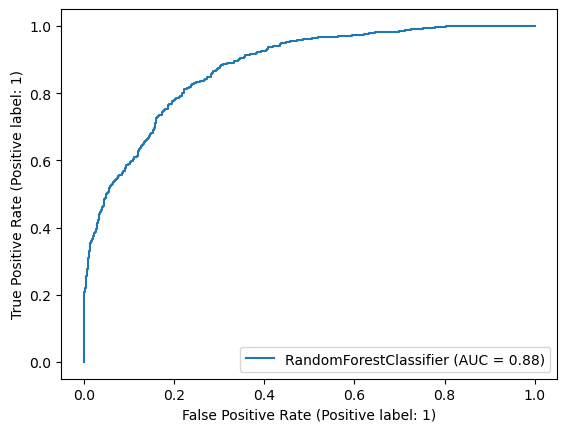

In [106]:
RocCurveDisplay.from_estimator(rf_model,x_smote,y_smote)
#The change with the shape of the curve is  improved by comparing with the Decision tree model and  The curve is
#not in close to the  original form and it is similar to  the good ROC curve as the edges are bell in shape.

# Gradient Boosting

In [107]:
gb_model=gb.fit(x_smote,y_smote)

In [108]:
gb_model.score(x_smote,y_smote)

0.7994444444444444

In [109]:
gb_predict=gb_model.predict(x_smote)

In [110]:
cross_val_score(gb_model,x_smote,y_smote)

array([0.59444444, 0.75277778, 0.76944444, 0.74722222, 0.78888889])

In [111]:
np.mean([0.59444444, 0.75277778, 0.76944444, 0.74722222, 0.78888889])
#cross validation score is so good with the gradient boosting score and so close.

0.730555554

In [112]:
print(classification_report(y_smote,gb_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       900
           1       0.80      0.80      0.80       900

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.80      0.80      0.80      1800



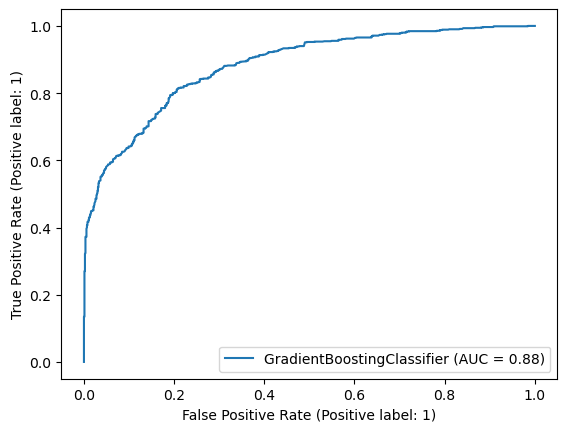

In [113]:
RocCurveDisplay.from_estimator(gb_model,x_smote,y_smote)
#The change with the shape of the curve is  improved by comparing with the Decision tree model and  The curve is
#not in close to the  original form and it is similar to  the good ROC curve as the edges are bell in shape.

By considering all the models Gradient boosting  is soo good as the cross validation score is close with the Gradient Boosting model score. 





Gradient Boosting will be the  best fit model.